# Question 1

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.ndimage import filters
from scipy import spatial

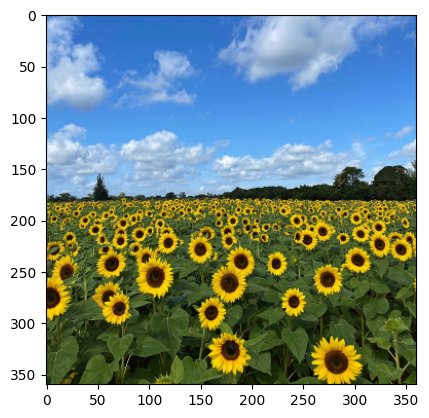

In [2]:
im = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)
im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
plt.imshow(im)


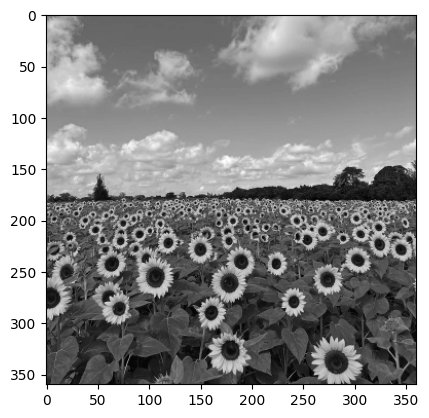

In [3]:
im1 = cv.cvtColor(im, cv.COLOR_RGB2GRAY)
plt.imshow(im1, cmap='gray')

The rule of thumb for Gaussian filter design is to choose the filter size to be about 3 times the standard deviation (sigma value) in each direction, for a total filter size of approximately 6sigma rounded to an odd integer value. The tails of a Gaussian function have amplitude that is effectively zero beyond three standard deviations from the mean, so keeping these filter coefficients does little to effect the result of filtering. It is also desired to ensure that a filter's edges go to zero on all sides. Additionally, truncating at 3sigma prevents the Gaussian filter from becoming too large, which makes the filtering process more computationally efficient.

In [5]:
def LoG(sigma):
    #window size
    n = np.ceil(sigma*6)
    y,x = np.ogrid[-n//2:n//2+1,-n//2:n//2+1]
    y_filter = np.exp(-(y*y/(2.*sigma*sigma)))
    x_filter = np.exp(-(x*x/(2.*sigma*sigma)))
    final_filter =  (-(2*sigma**2) + (x*x + y*y) ) *  (x_filter*y_filter) * (1/(2*np.pi*sigma**4))
    return final_filter

In [7]:
sigma = 1.0

In [8]:
def LoG_convolve(img):
        sigma_1 = sigma #sigma
        filter_log = LoG(sigma_1) #filter generation
        image = cv.filter2D(img,-1,filter_log) # convolving image
        #image = np.pad(image,((1,1),(1,1)),'constant') #padding
        #image = np.square(image) # squaring the response
        #plt.imshow(image, cmap='gray')
        #plt.imshow(filter_log,cmap='gray')
        return image
log_image_np = LoG_convolve(im1)
#print(log_image_np.shape)

Max value for sigma 1: 90


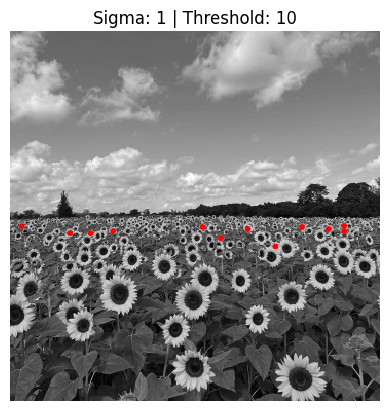

Max value for sigma 2: 96


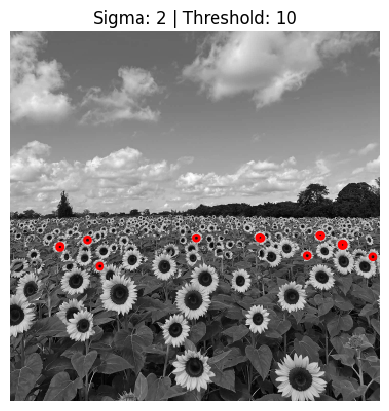

Max value for sigma 3: 96


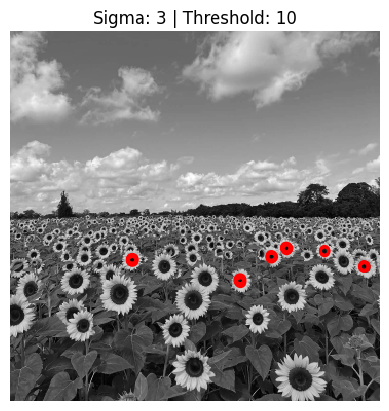

Max value for sigma 4: 95


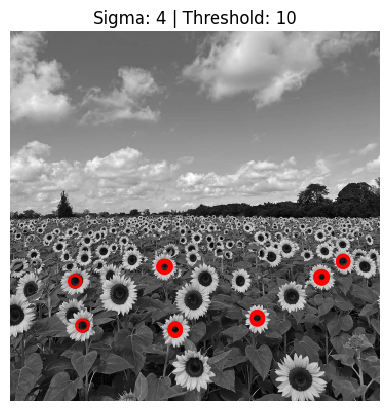

Max value for sigma 5: 85


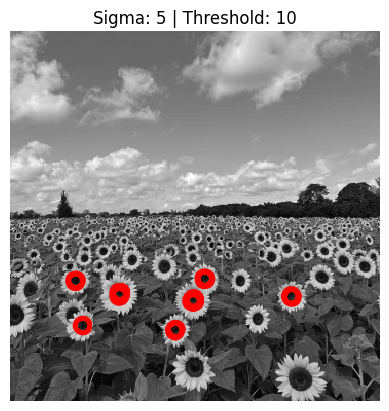

Max value for sigma 6: 90


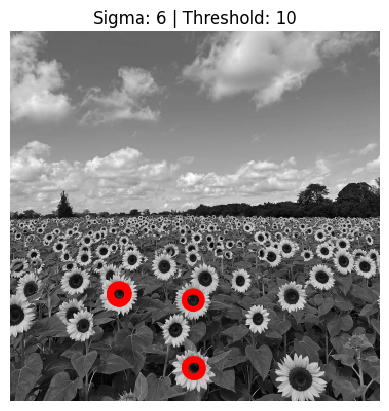

Max value for sigma 7: 84


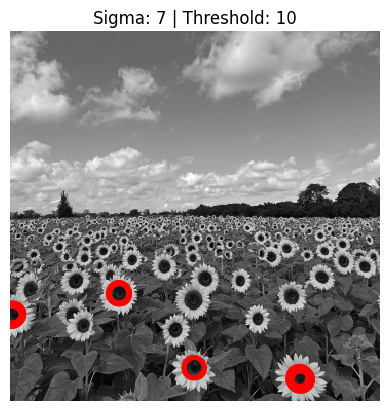

Max value for sigma 8: 82


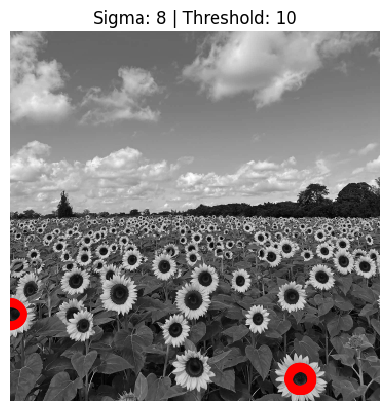

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming log_image_np is your image array and im1 is the original image to display
# Step 1: Set up the sigma range and threshold
sigma_range = range(1, 9)  # Sigma values from 1 to 6
Threshold = 10  # Define the threshold (adjust as necessary)

for sigma in sigma_range:
    log_image_np = LoG_convolve(im1)
    # Step 2: Find the maximum value in the image
    max_value = np.max(log_image_np)
    print(f"Max value for sigma {sigma}: {max_value}")

    # Step 3: Define the lower bound for the threshold
    lower_bound = max_value - Threshold

    # Step 4: Find all coordinates where the image value is within the threshold
    max_coords = np.where((log_image_np >= lower_bound) & (log_image_np <= max_value))
    #print(f"Coordinates for sigma {sigma}: {max_coords}")

    # Convert them into a list of (row, col) coordinates
    max_coords_list = list(zip(max_coords[0], max_coords[1]))

    # Step 5: Draw circles at each selected coordinate
    radius = sigma * 1.414  # Set the radius for the circles based on sigma
    color = 'red'  # Red color for the circles
    thickness = 2  # Thickness of the circle boundary

    # Create a figure and axis for plotting
    fig, ax = plt.subplots()
    ax.imshow(im1, interpolation='nearest', cmap="gray")

    # Loop through each coordinate and draw a circle
    for coord in max_coords_list:
        # Unpacking the coordinate directly
        y, x = coord  # (row, col) to (col, row)
        circle = plt.Circle((x, y), radius, color=color, linewidth=thickness, fill=False)
        ax.add_patch(circle)

    # Display the plot for the current sigma
    plt.axis('off')  # Hide the axis
    plt.title(f'Sigma: {sigma} | Threshold: {Threshold}')  # Add a title for clarity
    plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming log_image_np is your image array and im1 is the original image to display
# Step 1: Set up the sigma range and Threshold
sigma_range = range(1, 9)  # Sigma values from 1 to 6
threshold = 10  # Define the Threshold (adjust as necessary)

# Step 2: Create a figure with subplots
num_sigmas = len(sigma_range)
fig, axs = plt.subplots(2, 4, figsize=(15, 10))  # Create a 2x3 grid for 6 subplots
axs = axs.flatten()  # Flatten the 2D array of axes to 1D for easier indexing

for i, sigma in enumerate(sigma_range):
    # Step 3: Find the maximum value in the image
    log_image_np = LoG_convolve(im1)
    max_value = np.max(log_image_np)
    print(f"Max value for sigma {sigma}: {max_value}")

    # Step 4: Define the lower bound for the Threshold
    lower_bound = max_value - threshold

    # Step 5: Find all coordinates where the image value is within the Threshold
    max_coords = np.where((log_image_np >= lower_bound) & (log_image_np <= max_value))
   # print(f"Coordinates for sigma {sigma}: {max_coords}")

    # Convert them into a list of (row, col) coordinates
    max_coords_list = list(zip(max_coords[0], max_coords[1]))

    # Step 6: Draw circles at each selected coordinate
    radius = sigma * 1.414  # Set the radius for the circles based on sigma
    color = 'red'  # Red color for the circles
    thickness = 2  # Thickness of the circle boundary

    # Plotting on the corresponding subplot
    axs[i].imshow(im1, interpolation='nearest', cmap="gray")

    # Loop through each coordinate and draw a circle
    for coord in max_coords_list:
        # Unpacking the coordinate directly
        y, x = coord  # (row, col) to (col, row)
        circle = plt.Circle((x, y), radius, color=color, linewidth=thickness, fill=False)
        axs[i].add_patch(circle)

    # Configure the subplot
    axs[i].axis('off')  # Hide the axis
    axs[i].set_title(f'Sigma: {sigma} | Threshold: {threshold}')  # Add a title for clarity

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [16]:
import cv2 as cv
import numpy as np

# Initialize lists to store selected points
selected_points = []

# Mouse callback function to get points on click
def select_point(event, x, y, flags, param):
    if event == cv.EVENT_LBUTTONDOWN and len(selected_points) < 4:
        selected_points.append((x, y))
        print(f"Point selected: {x, y}")

# Load the original and overlay (flag) images
original_image = cv.imread('street1.jpg')
overlay_image = cv.imread('spider.jpg')

# Show the original image and set the mouse callback function
cv.imshow("Select 4 points on the architectural image", original_image)
cv.setMouseCallback("Select 4 points on the architectural image", select_point)

# Wait until 4 points are selected
while len(selected_points) < 4:
    cv.waitKey(1)

cv.destroyAllWindows()  # Close the image window after selecting points

# Convert selected points to a NumPy array of type float32
dest_points = np.array(selected_points).astype(np.float32)

# Get the dimensions of the overlay image (flag)
height, width = overlay_image.shape[:2]

# Define the four corners of the overlay (source points)
src_points = np.float32([[0, 0], [width, 0], [0, height], [width, height]])

# Compute the homography matrix
transformation_matrix = cv.getPerspectiveTransform(src_points, dest_points)

# Warp the overlay image (flag) to fit the selected points
transformed_image = cv.warpPerspective(overlay_image, transformation_matrix, (original_image.shape[1], original_image.shape[0]))

# Blend the warped image with the original image
blend_opacity = 0.5  # Adjust this value for different blending effects
final_image = cv.addWeighted(original_image, 1, transformed_image, blend_opacity, 0)

# Show the final blended image
cv.imshow("Final Blended Image", final_image)
cv.waitKey(0)
cv.destroyAllWindows()

# Save the result
cv.imwrite('output_image.jpg', final_image)


Point selected: (195, 191)
Point selected: (52, 304)
Point selected: (314, 179)
Point selected: (430, 298)


True